In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [122]:
df=pd.read_csv(r"Dataset.csv")
df.head(5)

,Unnamed: 0,BHK,Type,Location,Area,No_of_Bathrooms,Price,Preference,Furnishing,price_category
0,0,4,Villa,Hyderabad,4000,4,110000,Bachelors,Semi-Furnished,medium
1,1,5,Villa,Hyderabad,4030,7,110000,Family,Semi-Furnished,medium
2,2,5,Villa,Hyderabad,6000,5,400000,Bachelors,Unfurnished,medium
3,3,4,House,Hyderabad,2285,4,31000,Family,Semi-Furnished,medium
4,4,2,Villa,Hyderabad,1215,2,28000,Family,Semi-Furnished,medium


In [125]:
df.describe()

,Unnamed: 0,BHK,Area,No_of_Bathrooms,Price
count,769.000000,769.000000,769.000000,769.000000,769.000000
mean,392.807542,2.379714,1489.966190,2.370611,69585.031209
std,223.674439,1.348767,1436.182877,1.397252,110819.651226
min,0.000000,1.000000,6.000000,1.000000,2500.000000
25%,200.000000,1.000000,550.000000,1.000000,12000.000000
50%,394.000000,2.000000,990.000000,2.000000,23000.000000
75%,586.000000,3.000000,1900.000000,3.000000,75000.000000
max,778.000000,10.000000,8111.000000,9.000000,750000.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       769 non-null    int64 
 1   BHK              769 non-null    int64 
 2   Type             769 non-null    object
 3   Location         769 non-null    object
 4   Area             769 non-null    int64 
 5   No_of_Bathrooms  769 non-null    int64 
 6   Price            769 non-null    int64 
 7   Preference       769 non-null    object
 8   Furnishing       769 non-null    object
 9   price_category   769 non-null    object
dtypes: int64(5), object(5)
memory usage: 60.2+ KB


In [116]:
df['Location'].value_counts()

Chennai      403
Mumbai       280
Bangalore     30
Kolkata       29
Hyderabad     27
Name: Location, dtype: int64

In [48]:
df.isna().sum()

Unnamed: 0         0
BHK                0
Type               0
Location           0
Area               0
No_of_Bathrooms    0
Price              0
Preference         0
Furnishing         0
price_category     0
dtype: int64

In [49]:
df.duplicated().sum()

0

### Which city have more availability for rentals ?

In [52]:
import emoji

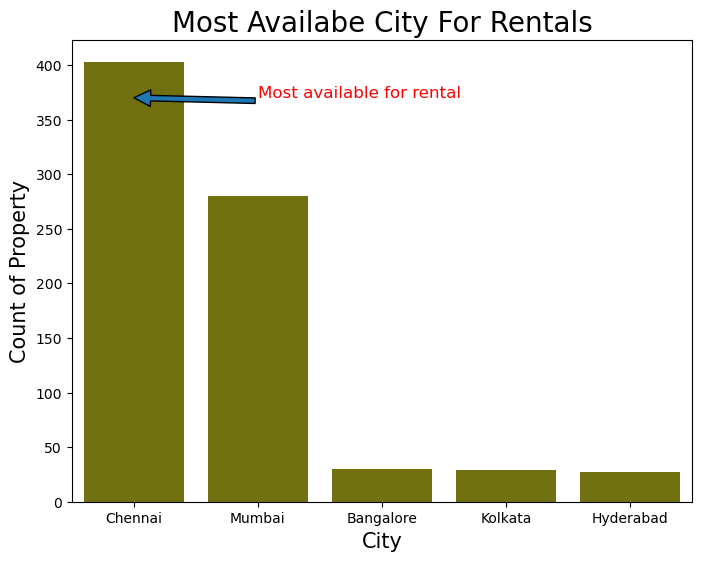

In [104]:
city_count = df['Location'].value_counts()

# Create a bar plot
plt.figure(figsize=(8,6))
bar_plot = sns.barplot(x=city_count.index, y=city_count.values, color='olive')

# Title and labels
plt.title('Most Availabe City For Rentals', fontsize=20)
plt.ylabel('Count of Property', fontsize=15)
plt.xlabel('City', fontsize=15)

# Identify the highest value
max_city_index = city_count.idxmax()
max_city_value = city_count.max()
max_city_position = city_count.index.get_loc(max_city_index)

# Add an arrow to the highest bar with adjusted position beside the bar
bar_plot.annotate(
    'Most available for rental  ',
    xy=(0,370),  # Pointing to the top of the highest bar
    xytext= (1, 370),  # Positioning to the right of the bar
    arrowprops= {},
    fontsize=12,
    color='red'
)

plt.show()

### By the above visual the city chennai has more availability for people to rent

### Which is the most prefered BHK?

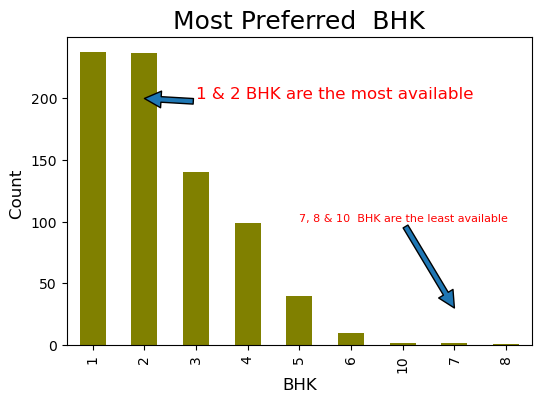

In [114]:
BHk_counts=df['BHK'].value_counts()
plt.figure(figsize=(6,4)) 
BHk_counts.plot.bar(color='olive')
plt.title('Most Preferred  BHK', fontsize = 18)
plt.ylabel('Count ', fontsize = 12)
plt.xlabel( 'BHK', fontsize = 12)

plt.annotate(
    '1 & 2 BHK are the most available',
    xy=(1,200),  # Pointing to the top of the highest bar
    xytext= (2, 200),  # Positioning to the right of the bar
    arrowprops= {},
    fontsize=12,
    color='red'
)
plt.annotate(
    '7, 8 & 10  BHK are the least available',
    xy=(7,30),  # Pointing to the top of the highest bar
    xytext= (4, 100),  # Positioning to the right of the bar
    arrowprops= {},
    fontsize=8,
    color='red')
plt.show()




#### Most of people prefer 1BHK and 2BHK for rentals

### Which type of Property is most prefered?

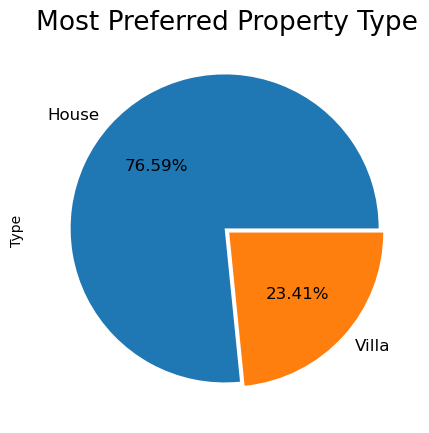

In [69]:
# visualization using pie-chart
Type_House=df['Type'].value_counts()
Type_House.plot.pie(explode = [0.02,0.02], autopct = '%1.2f%%', fontsize = 12, figsize = (10,5))
plt.title('Most Preferred Property Type', fontsize = 19)
plt.show()

### Most of the people preferred house rather than villa because house can be available at cheaper price when compared to villa

### On which category of people owners are showing interest to give rentals? 

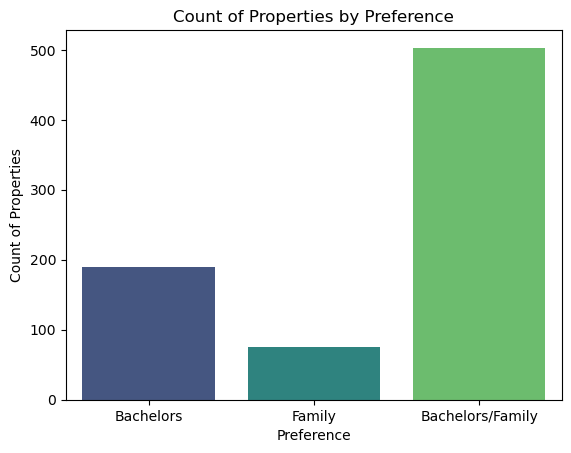

In [63]:
sns.countplot(data=df, x='Preference', palette='viridis')
plt.title('Count of Properties by Preference')
plt.xlabel('Preference')
plt.ylabel('Count of Properties')
plt.show()

### Most of the owners perfer to give rentals for family or for bachelor's .But some of the owners have restrictions to give only rent to only for bachleor's or for only Families.


### What is the average price in differerent locations based on property type?

Text(0, 0.5, 'Average Price (in ₹)')

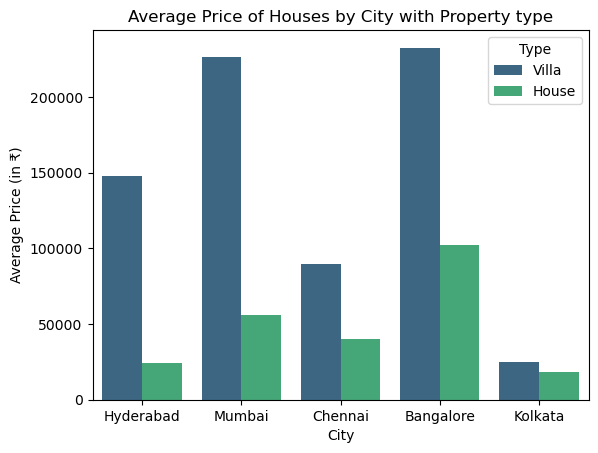

In [66]:
sns.barplot(data=df, x='Location', y='Price', hue='Type', palette='viridis', ci=None)
plt.title('Average Price of Houses by City with Property type')
plt.xlabel('City')
plt.ylabel('Average Price (in ₹)')

### Villa's has more average price in different locations . The main reason for that is Villa's have more luxirious infrastructure when compared to houses.

### What is the average price based on types of BHK?

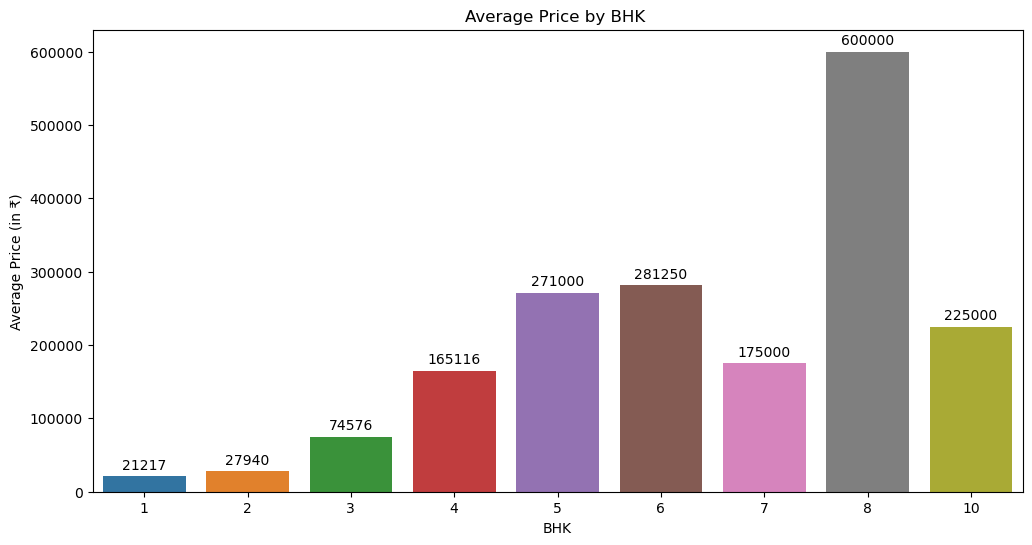

In [67]:
avg_price_bhk = df.groupby('BHK')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='BHK', y='Price', data=avg_price_bhk)
plt.title('Average Price by BHK ')
plt.xlabel('BHK')
plt.ylabel('Average Price (in ₹)')

# Add values on top of each bar
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.f', padding=3)

plt.show()

### 8BHK have highest averge price of 6L . The reason behind that the availability of 8BHK is less when compared to other BHK's

### What is the average price of property with respective to  Location?

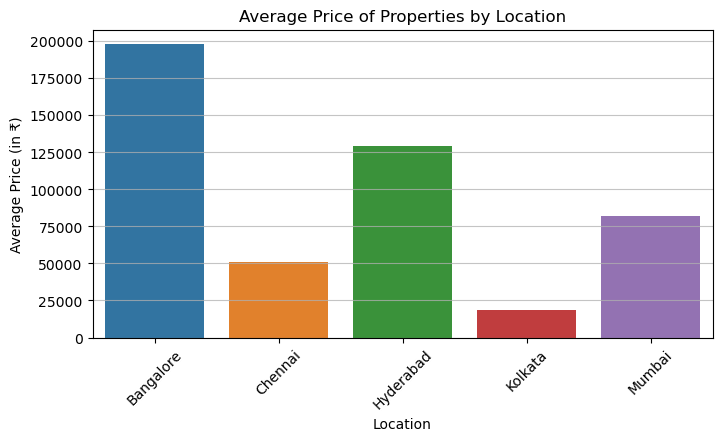

In [68]:
average_price_location = df.groupby('Location')['Price'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=average_price_location, x='Location', y='Price')
plt.title('Average Price of Properties by Location')
plt.xlabel('Location')
plt.ylabel('Average Price (in ₹)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Bangalore has highest average price due to rapid population growth driven by job opportunities in the IT sector, leading to high demand for housing.

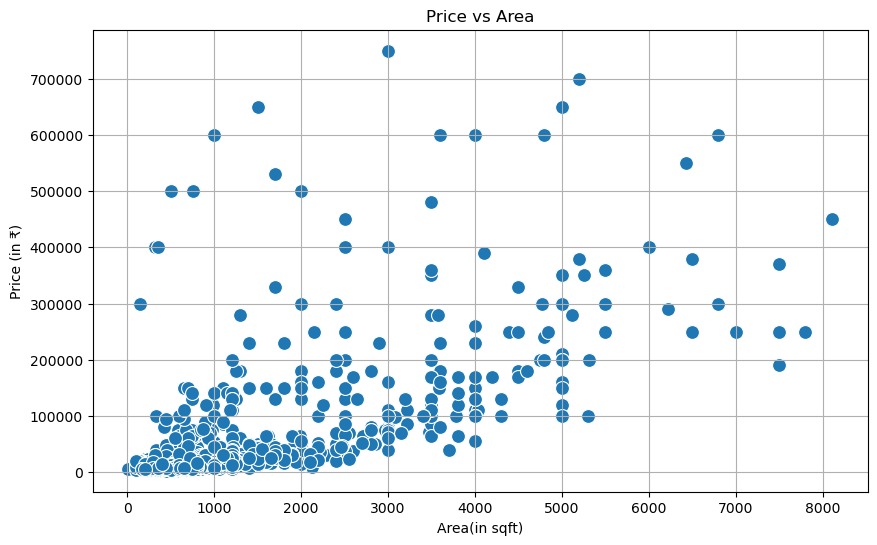

In [87]:
# Create a scatter plot for Price vs Location
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Area', y='Price',palette='deep', s=100)
plt.title('Price vs Area')
plt.xlabel('Area(in sqft)')
plt.ylabel('Price (in ₹)')
plt.grid()
plt.show()


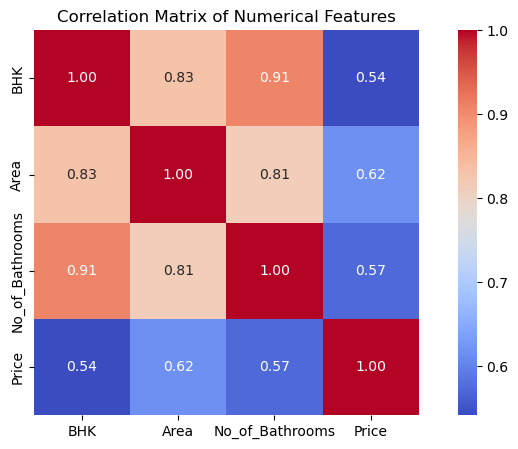

In [29]:
numerical_columns = ['BHK', 'Area', 'No_of_Bathrooms', 'Price']
correlation_data = df[numerical_columns]
# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap of correlations
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

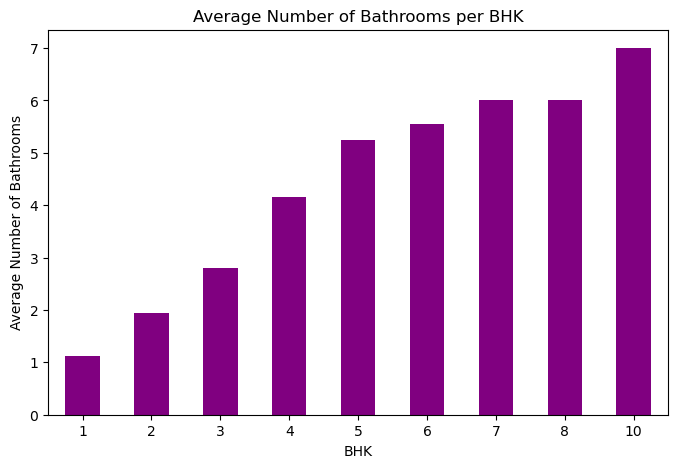

In [33]:
# Average number of bathrooms per BHK
bath_bhk_ratio = df.groupby('BHK')['No_of_Bathrooms'].mean()

# Plot
plt.figure(figsize=(8,5))
bath_bhk_ratio.plot(kind='bar', color='purple')
plt.title('Average Number of Bathrooms per BHK')
plt.xlabel('BHK')
plt.ylabel('Average Number of Bathrooms')
plt.xticks(rotation=0)
plt.show()


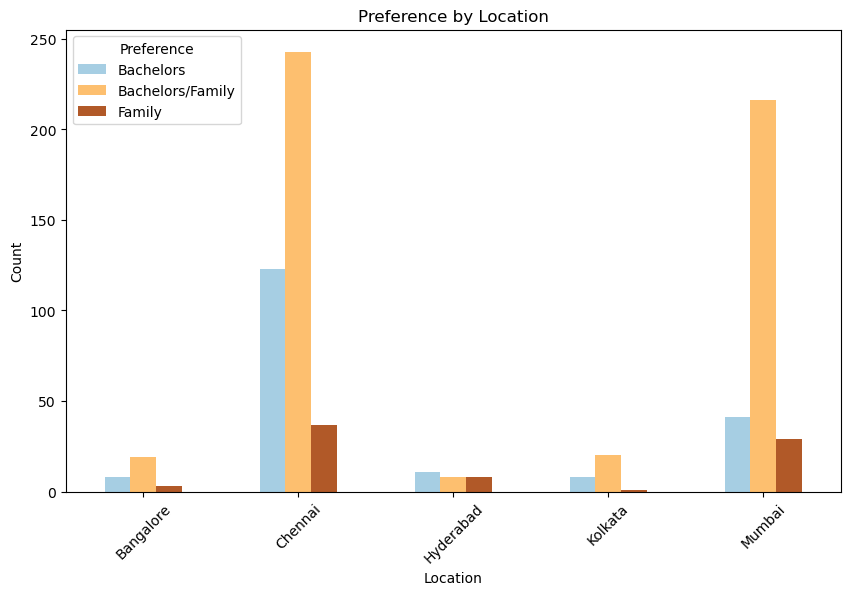

In [34]:
# Count of preferences in each location
preference_by_location = df.groupby(['Location', 'Preference']).size().unstack()

# Plot
preference_by_location.plot(kind='bar', stacked=False, figsize=(10,6), cmap='Paired')
plt.title('Preference by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Preference')
plt.show()


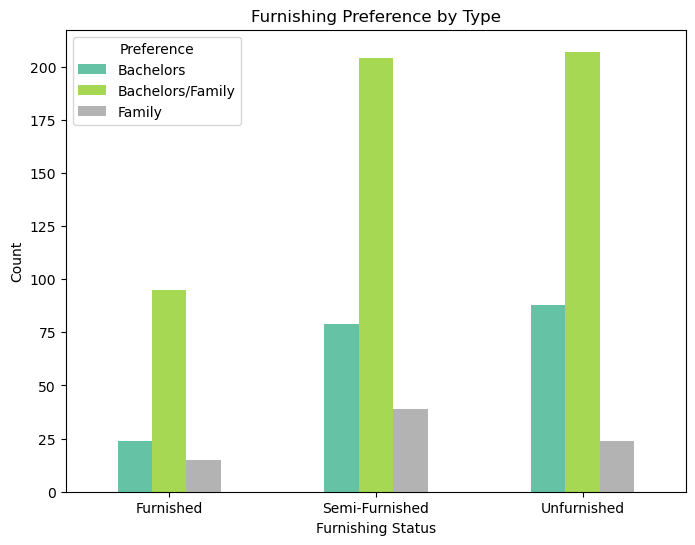

In [35]:
# Count of preferences by furnishing type
preference_furnishing = df.groupby(['Furnishing', 'Preference']).size().unstack()

# Plot
preference_furnishing.plot(kind='bar', stacked=False, figsize=(8,6), cmap='Set2')
plt.title('Furnishing Preference by Type')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Preference')
plt.show()


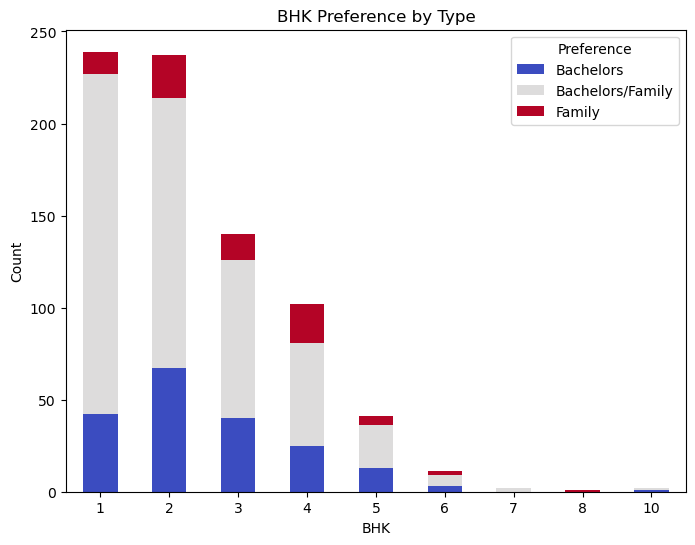

In [36]:
# Count of preferences by BHK
preference_bhk = df.groupby(['BHK', 'Preference']).size().unstack()

# Plot
preference_bhk.plot(kind='bar', stacked=True, figsize=(8,6), cmap='coolwarm')
plt.title('BHK Preference by Type')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Preference')
plt.show()


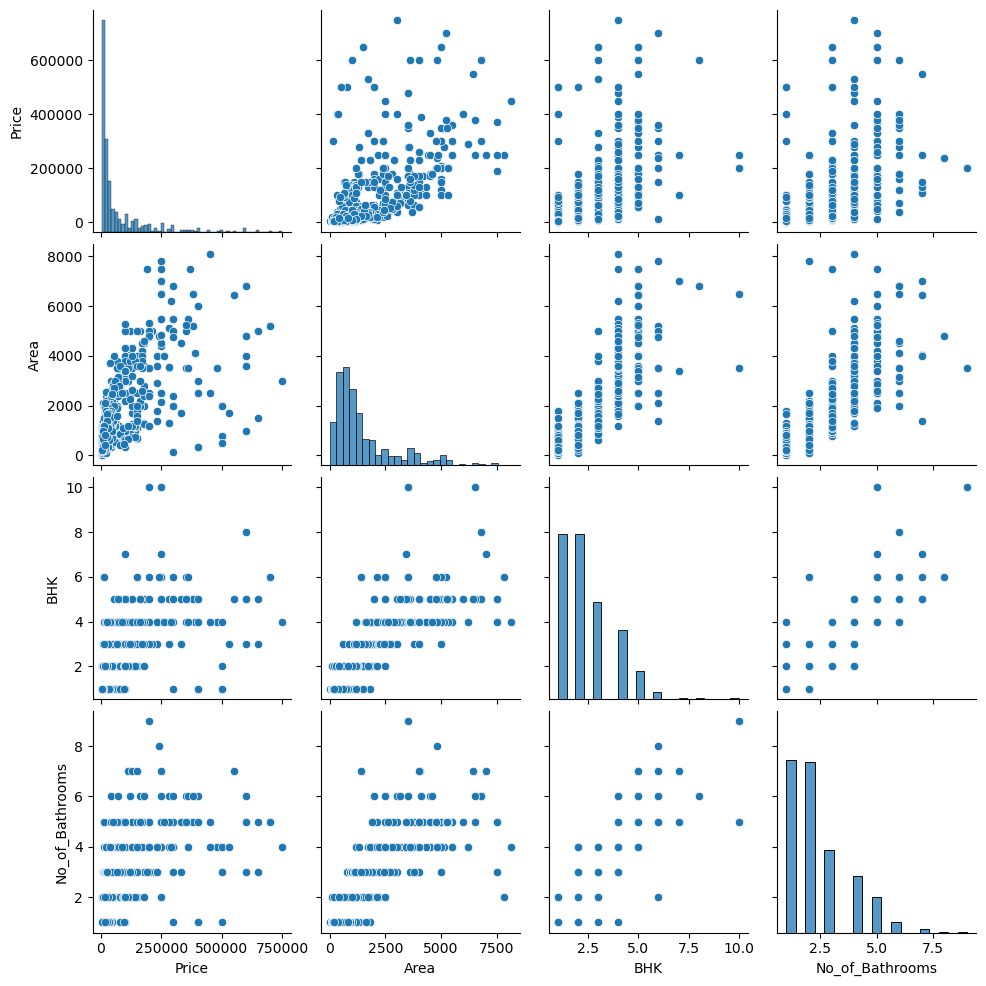

In [130]:
# Pair plot of numerical variables
sns.pairplot(df[['Price', 'Area', 'BHK', 'No_of_Bathrooms']])
plt.show()


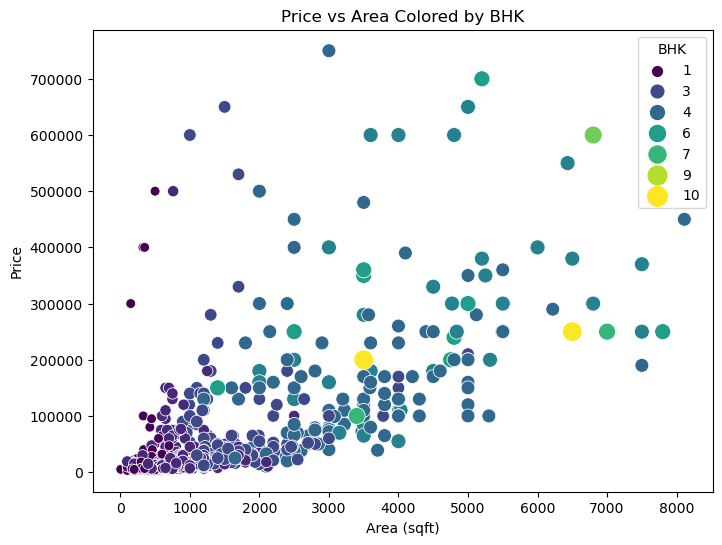

In [117]:
# Scatter plot: Price vs Area colored by BHK
plt.figure(figsize=(8,6))
sns.scatterplot(x='Area', y='Price', hue='BHK', data=df, palette='viridis', size='BHK', sizes=(50,200), y_bins="log")
plt.title('Price vs Area Colored by BHK')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.show()


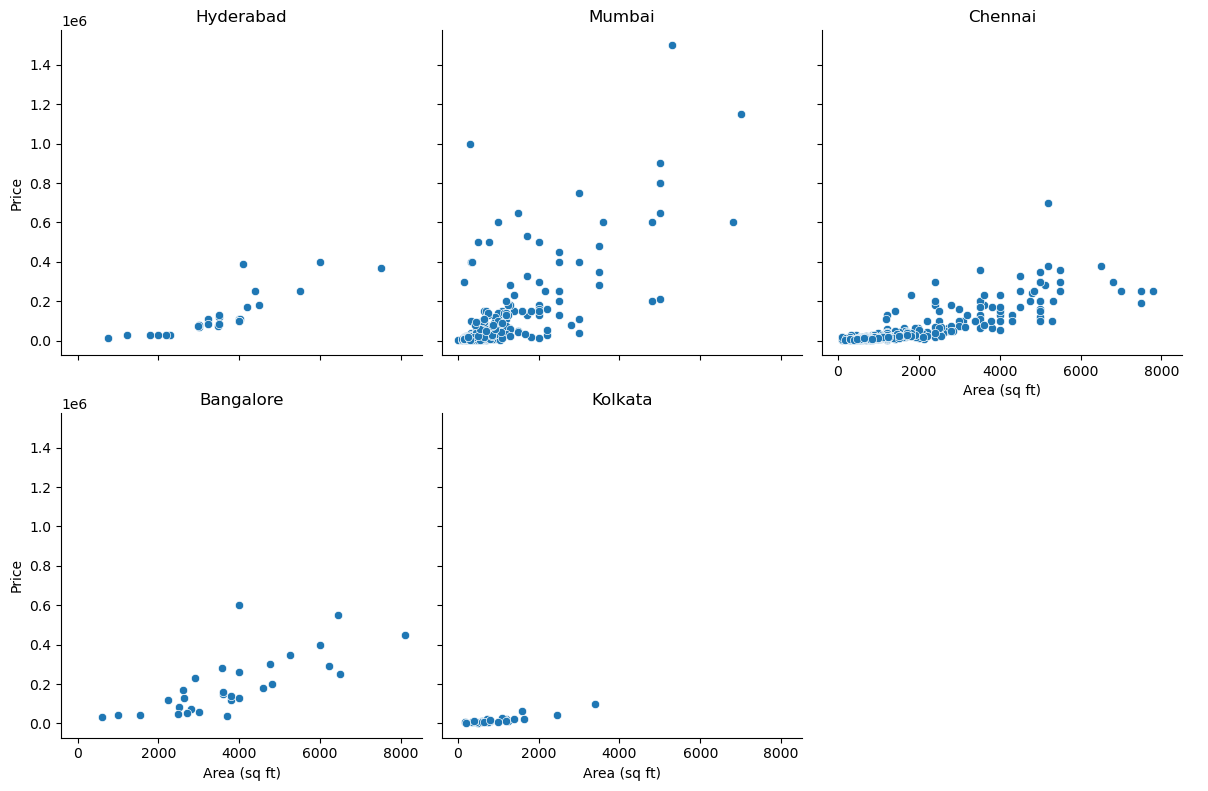

In [28]:
g = sns.FacetGrid(df, col='Location', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Area', 'Price')
g.add_legend()

# Add titles and labels to each subplot
for ax in g.axes.flatten():
    ax.set_title(ax.get_title().split('=')[1].strip())  # Clean up title to just show location
    ax.set_xlabel('Area (sq ft)')
    ax.set_ylabel('Price')

plt.show()

In [20]:
df["Price"][0]

110000

INSIGHT:
Properties with more BHKs (Bedrooms, Halls, Kitchens) tend to have more bathrooms (correlation of 0.90).
Properties with more BHKs also tend to be more expensive (correlation of 0.47).
There is a moderate correlation between the number of bathrooms and the price (0.49).
The area of the property does not significantly affect the number of BHKs, number of bathrooms, or the price.


INSIGHT:
Properties with larger areas generally have higher prices.
Higher BHK properties (more bedrooms) are larger and more expensive.
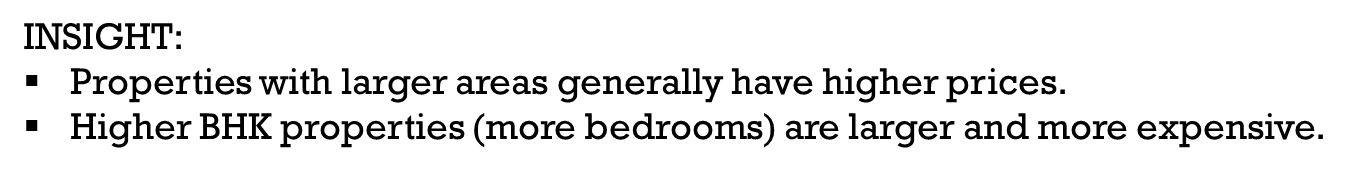